In [ ]:
from pprint import pformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import time
from KNNAnalytics import KNN
np.seterr(all="ignore")

In [3]:
# Load data:

data = pd.read_csv("bodyfat.csv")
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [6]:
# Preprocessing:

predict = 'BodyFat'

Y = data[predict]
X = data.drop(columns=[predict])
Xlabels = X.columns

Y = Y.transform(lambda x: 1 if x <= 5 else (2 if x>5 and x<=14 else (3 if x>14 and x<16 else(4 if x>=16 and x<25 else 5))))

print(f'Target Class:\n{Y.head()}')
print(f'Feature Class:\n{X.head()}')

Y = Y.to_numpy()
X = X.to_numpy()

Target Class:
0    2
1    2
2    5
3    2
4    5
Name: BodyFat, dtype: int64
Feature Class:
   Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


O melhor testsize é: 0.1


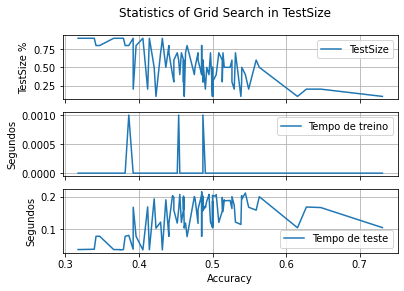

In [9]:
# Find the best split train/test for the data

accTestsize = []
modelosTestsize = []

for i in range(10):
    for t in np.arange(0.1, 1, 0.1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t)
        clf = KNN()

        tempoTreino = time.time()
        clf.fit(X_train, Y_train, Xlabels)
        tempoTreino = time.time() - tempoTreino

        tempoTeste = time.time()
        pred, p = clf.predict(X_test)
        tempoTeste = time.time() - tempoTeste

        acc = clf.getAccuracy(pred, Y_test)

        modelosTestsize.append([clf, t, acc, tempoTreino, tempoTeste])
        accTestsize.append(acc)

for i in range(len(accTestsize)):
    for j in range(i + 1, len(accTestsize)):
        if accTestsize[i] > accTestsize[j]:
            modelosTestsize[i], modelosTestsize[j] = modelosTestsize[j], modelosTestsize[i]
            accTestsize[i], accTestsize[j] = accTestsize[j], accTestsize[i]

bestTestsize = modelosTestsize[-1]
testsize = bestTestsize[1]

print(f'O melhor testsize é: {testsize}')

modelosTestsize = np.array(modelosTestsize)
fig, axs = plt.subplots(3)
fig.suptitle('Statistics of Grid Search in TestSize')

axs[0].plot(modelosTestsize[:, 2], modelosTestsize[:, 1], label="TestSize")
axs[0].set_ylabel("TestSize %")
axs[0].legend()
axs[0].grid()

axs[1].plot(modelosTestsize[:, 2], modelosTestsize[:, 3], label="Tempo de treino")
axs[1].set_ylabel("Segundos")
axs[1].legend()
axs[1].grid()

axs[2].plot(modelosTestsize[:, 2], modelosTestsize[:, 4], label="Tempo de teste")
axs[2].set_ylabel("Segundos")
axs[2].legend()
axs[2].grid()
axs[2].set_xlabel("Accuracy")
for ax in axs.flat:
    ax.label_outer()

In [ ]:
# Find the best paramns kn and r for the data:

accParamns = []
modelosParamns = []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=testsize)

for r in range(1, 3):
    for k in range(1, 21):
        clf = KNN(kn=k, r=r)

        tempoTreino = time.time()
        clf.fit(X_train, Y_train, Xlabels)
        tempoTreino = time.time() - tempoTreino

        tempoTeste = time.time()
        pred, p = clf.predict(X_test)
        tempoTeste = time.time() - tempoTeste

        acc = clf.getAccuracy(pred, Y_test)

        modelosParamns.append([clf, k, r, acc, tempoTreino, tempoTeste])
        accParamns.append(acc)

for i in range(len(accParamns)):
    for j in range(i + 1, len(accParamns)):
        if accParamns[i] > accParamns[j]:
            modelosParamns[i], modelosParamns[j] = modelosParamns[j], modelosParamns[i]
            accParamns[i], accParamns[j] = accParamns[j], accParamns[i]

bestParamns = modelosParamns[-1]
kn = bestParamns[1]
r = bestParamns[2]

print(f'O melhor kn é: {kn}')
print(f'O melhor r é: {r}')

modelosParamns = np.array(modelosParamns)
fig, axs = plt.subplots(4)
fig.suptitle('Statistics of Grid Search in TestSize')

axs[0].plot(modelosParamns[:, 3], modelosParamns[:, 1], label="kn")
axs[0].set_ylabel("kn")
axs[0].legend()
axs[0].grid()

axs[1].plot(modelosParamns[:, 3], modelosParamns[:, 2], label="r")
axs[1].set_ylabel("r")
axs[1].legend()
axs[1].grid()

axs[2].plot(modelosParamns[:, 3], modelosParamns[:, 4], label="Tempo de treino")
axs[2].set_ylabel("Tempo de treino")
axs[2].legend()
axs[2].grid()

axs[3].plot(modelosParamns[:, 3], modelosParamns[:, 5], label="Tempo de teste")
axs[3].set_ylabel("Tempo de teste")
axs[3].legend()
axs[3].grid()
axs[3].set_xlabel("Accuracy")
for ax in axs.flat:
    ax.label_outer()